In [1]:
import matplotlib as mpl
import numpy as np
mpl.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [2]:
import pandas as pd
import re 
summary_data = pd.read_pickle('data/summary.pickle')

Find all columns with score

In [3]:
metrics_columns = [f for f in summary_data.columns if not re.match(r"(?:fold|model|data|preproc)", f)]
features_columns = [f for f in summary_data.columns if re.match(r"(?:fold|model|data|preproc)", f)]
print(metrics_columns, features_columns)

['mean_absolute_error', 'mean_squared_error'] ['folds_name', 'folds_params', 'model_name', 'model_params', 'data_fname', 'preproc_name', 'preproc_params']


Find mean, max, min, std for metrics

In [4]:
%time
for k in metrics_columns:
    summary_data[str(k) + "_mean"] = summary_data[str(k)].apply(pd.Series).mean(axis=1)
    summary_data[str(k) + "_min"] = summary_data[str(k)].apply(pd.Series).min(axis=1)
    summary_data[str(k) + "_max"] = summary_data[str(k)].apply(pd.Series).max(axis=1)
    summary_data[str(k) + "_std"] = summary_data[str(k)].apply(pd.Series).std(axis=1)


CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.77 µs


In [5]:
summary_data.head(3)

,mean_absolute_error,mean_squared_error,folds_name,folds_params,model_name,model_params,data_fname,preproc_name,preproc_params,mean_absolute_error_mean,mean_absolute_error_min,mean_absolute_error_max,mean_absolute_error_std,mean_squared_error_mean,mean_squared_error_min,mean_squared_error_max,mean_squared_error_std
0,"[0.13453717451229483, 0.1006150866417214, 0.07...","[0.018232579461305357, 0.010194916660901658, 0...",KFold,{'n_splits': 10},LGBMRegressor,{'max_depth': 2},NaN,NaN,NaN,0.072563,0.013847,0.134537,0.043412,0.007062,0.000257,0.018233,0.006622
0,"[0.13458523, 0.10066615, 0.07054384, 0.0428381...","[0.01824857, 0.010210784, 0.0050734538, 0.0019...",KFold,{'n_splits': 10},XGBRegressor,{'learning_rate': 0.1},NaN,NaN,NaN,0.072597,0.013985,0.134585,0.043353,0.007069,0.000267,0.018249,0.006617
0,"[0.13466854762034705, 0.10002003643770356, 0.0...","[0.019032266737407925, 0.011069265082396687, 0...",KFold,{'n_splits': 10},RandomForestRegressor,{'criterion': 'mse'},NaN,NaN,NaN,0.076332,0.030606,0.134669,0.038390,0.008069,0.001449,0.019032,0.006480


combine model's detail in one column

In [6]:
def unit_data(x):
    x_all = ''
    for x_i in x:
        if x_i != 'nan':
            x_all += x_i
            x_all += '\n'
    return x_all        

In [7]:
summary_data['label'] = summary_data[features_columns].astype(str).apply(unit_data,1)

sort dataframe by mean value

In [8]:
sort_summary_data = summary_data.sort_values(by=['mean_squared_error_mean'], ascending=True)

# MAE metric 

In [10]:
metric_mae = sort_summary_data['mean_absolute_error'].apply(pd.Series).fillna(0).values
r_metric_mae = [list(x) for x in zip(*metric_mae)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

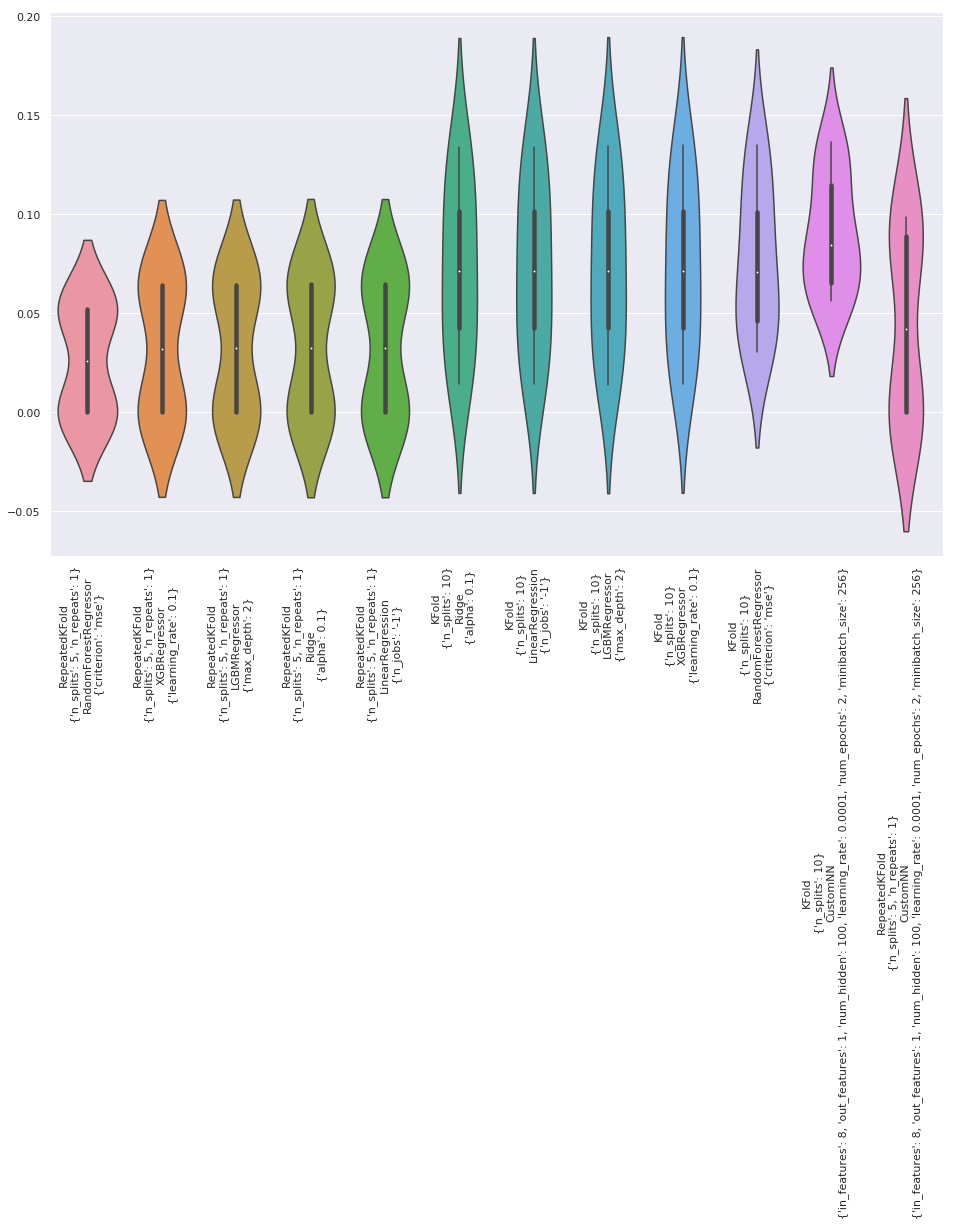

In [12]:
sns.set(rc={'figure.figsize':(16,10)})
# Show each distribution with violins
ax = sns.violinplot(data=np.array(r_metric_mae))
ax.set_xticklabels(sort_summary_data['label'].values)
plt.xticks(rotation=90)

# RMSE metric 

In [13]:
metric_rmse = sort_summary_data['mean_squared_error'].apply(pd.Series).fillna(0).values
r_metric_rmse = [list(x) for x in zip(*metric_rmse)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

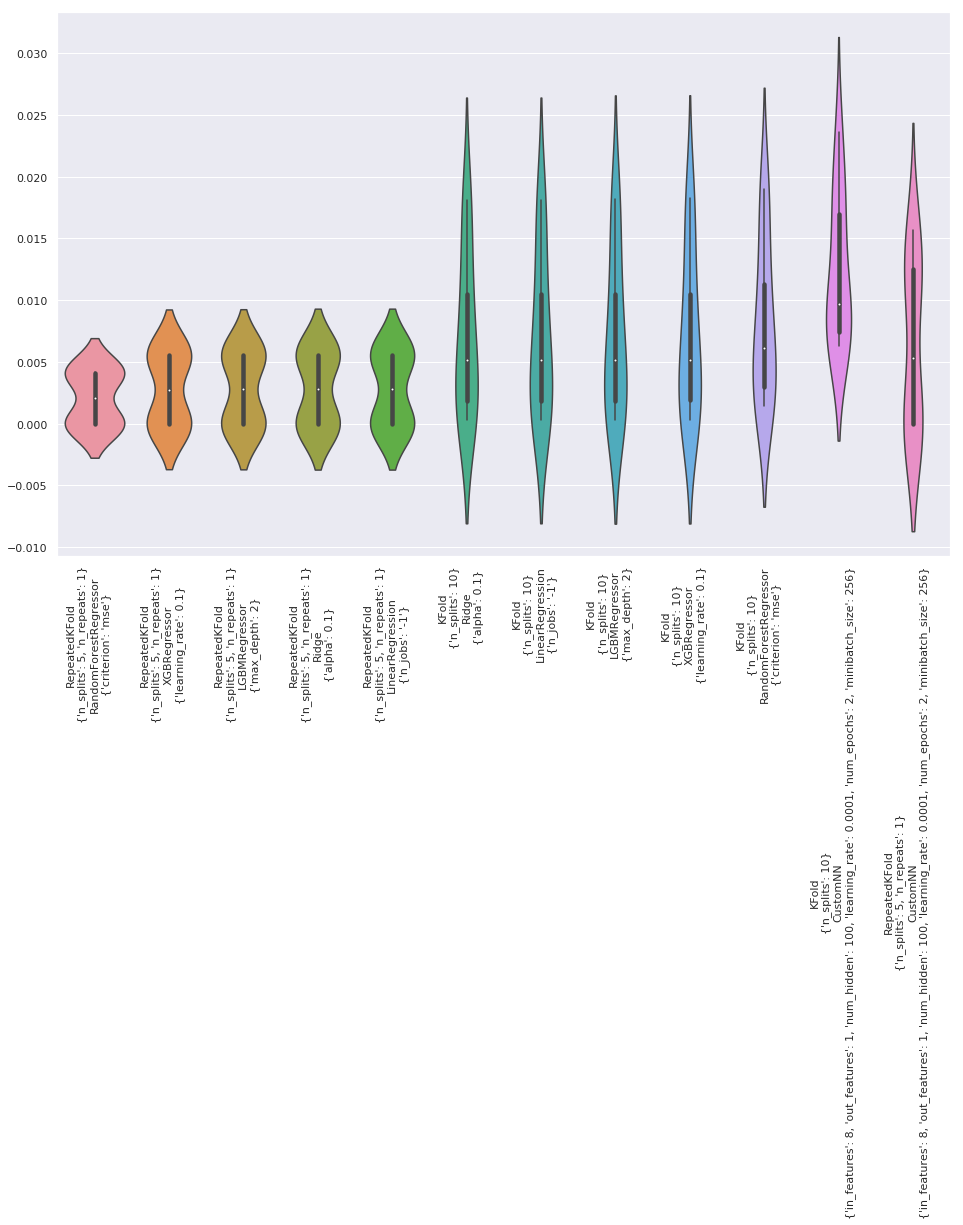

In [14]:
sns.set(rc={'figure.figsize':(16,10)})
# Show each distribution with violins
ax = sns.violinplot(data=np.array(r_metric_rmse))
ax.set_xticklabels(sort_summary_data['label'].values)
plt.xticks(rotation=90)